# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表


=== 策略：tvl_sma ===


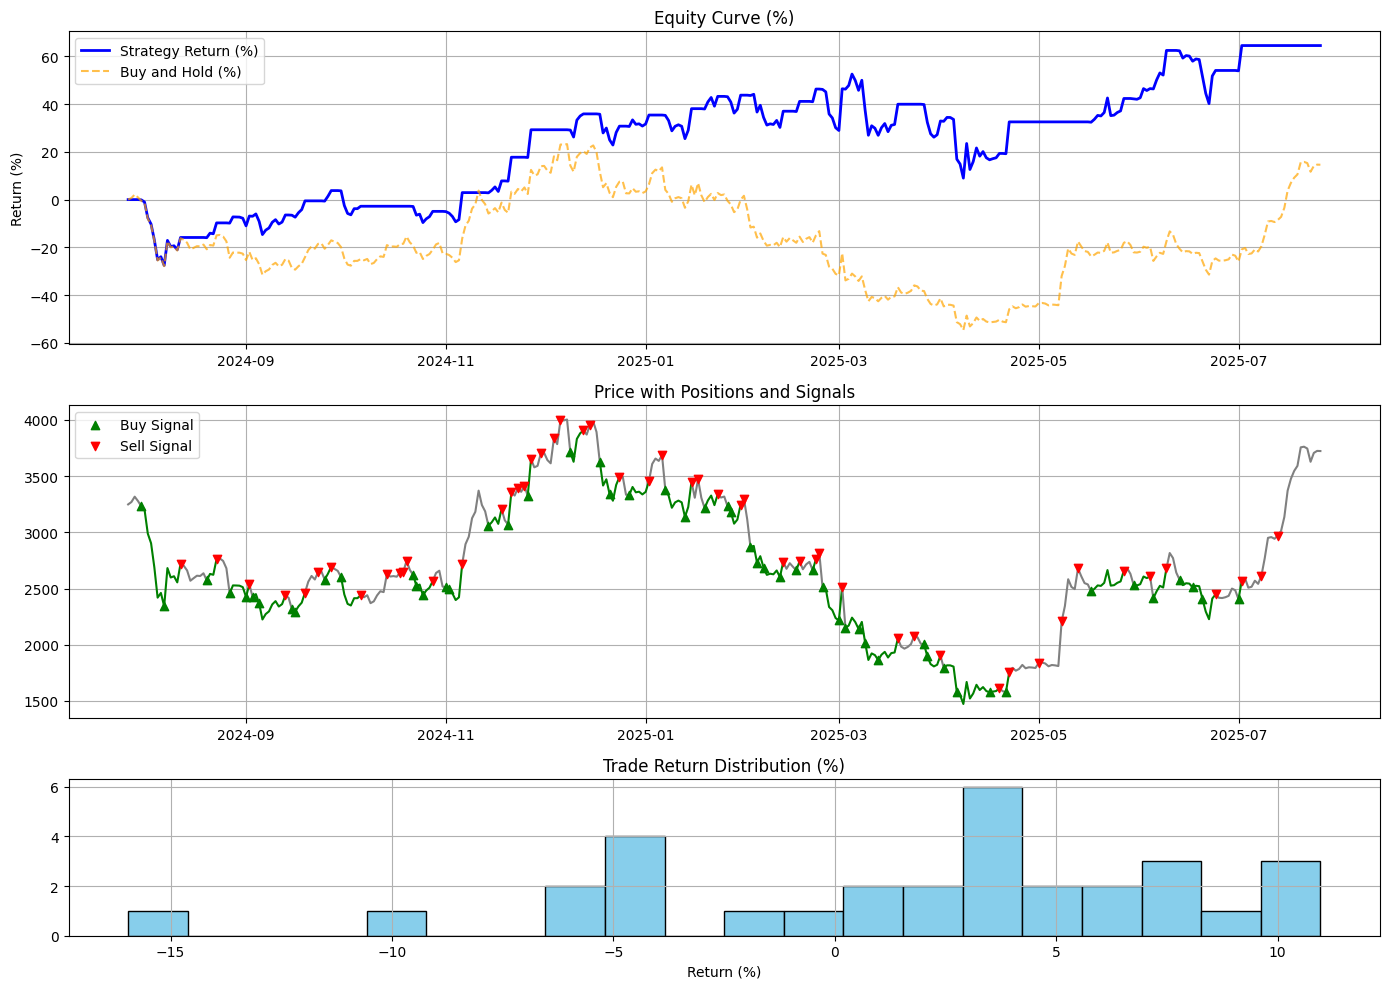

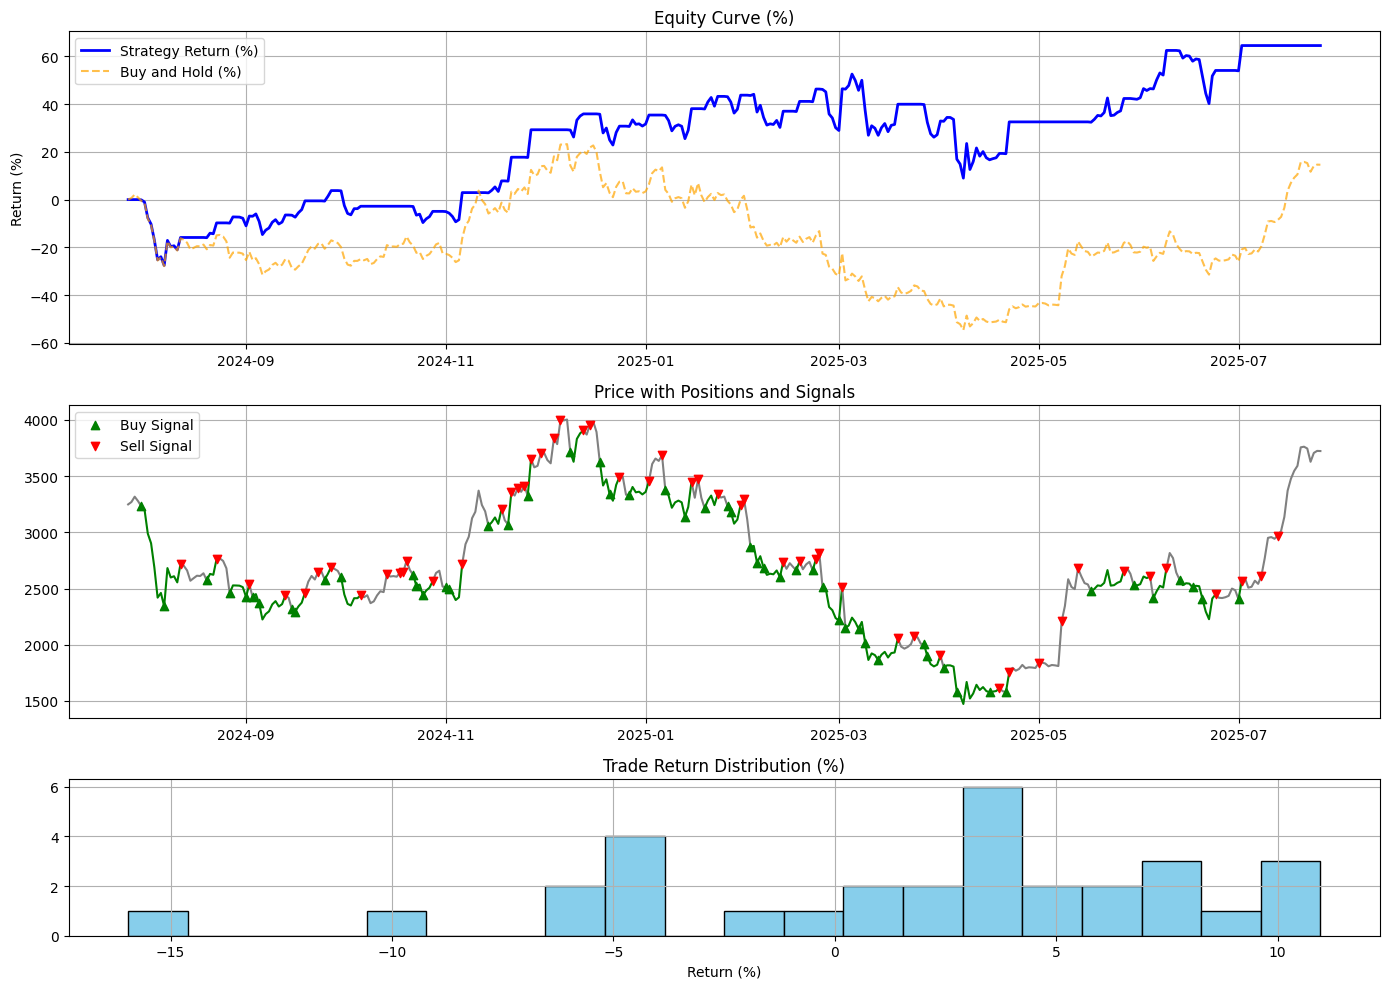

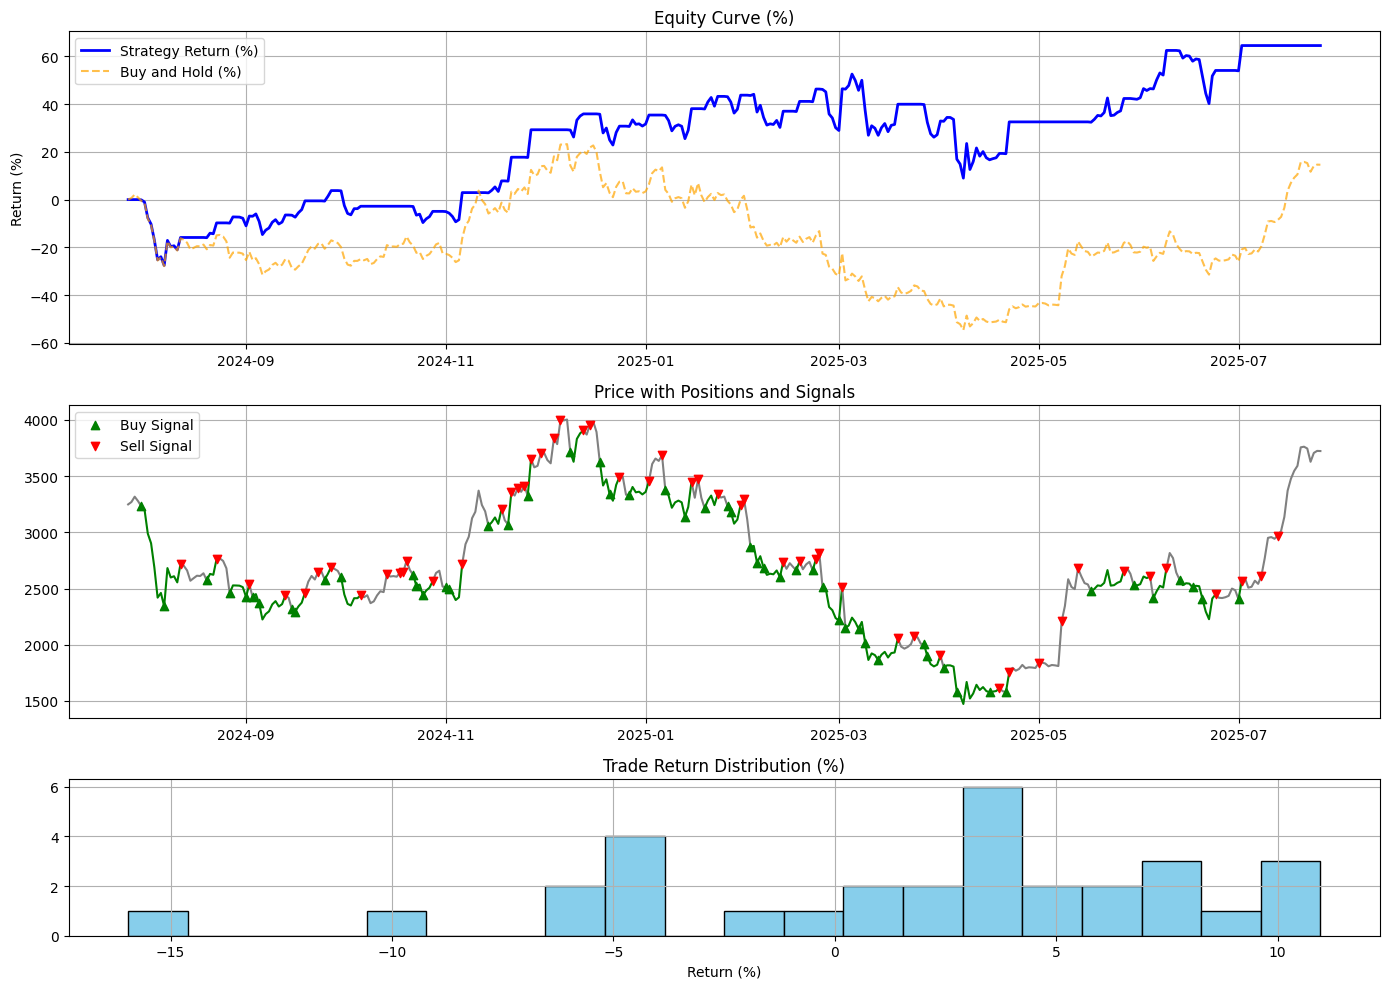

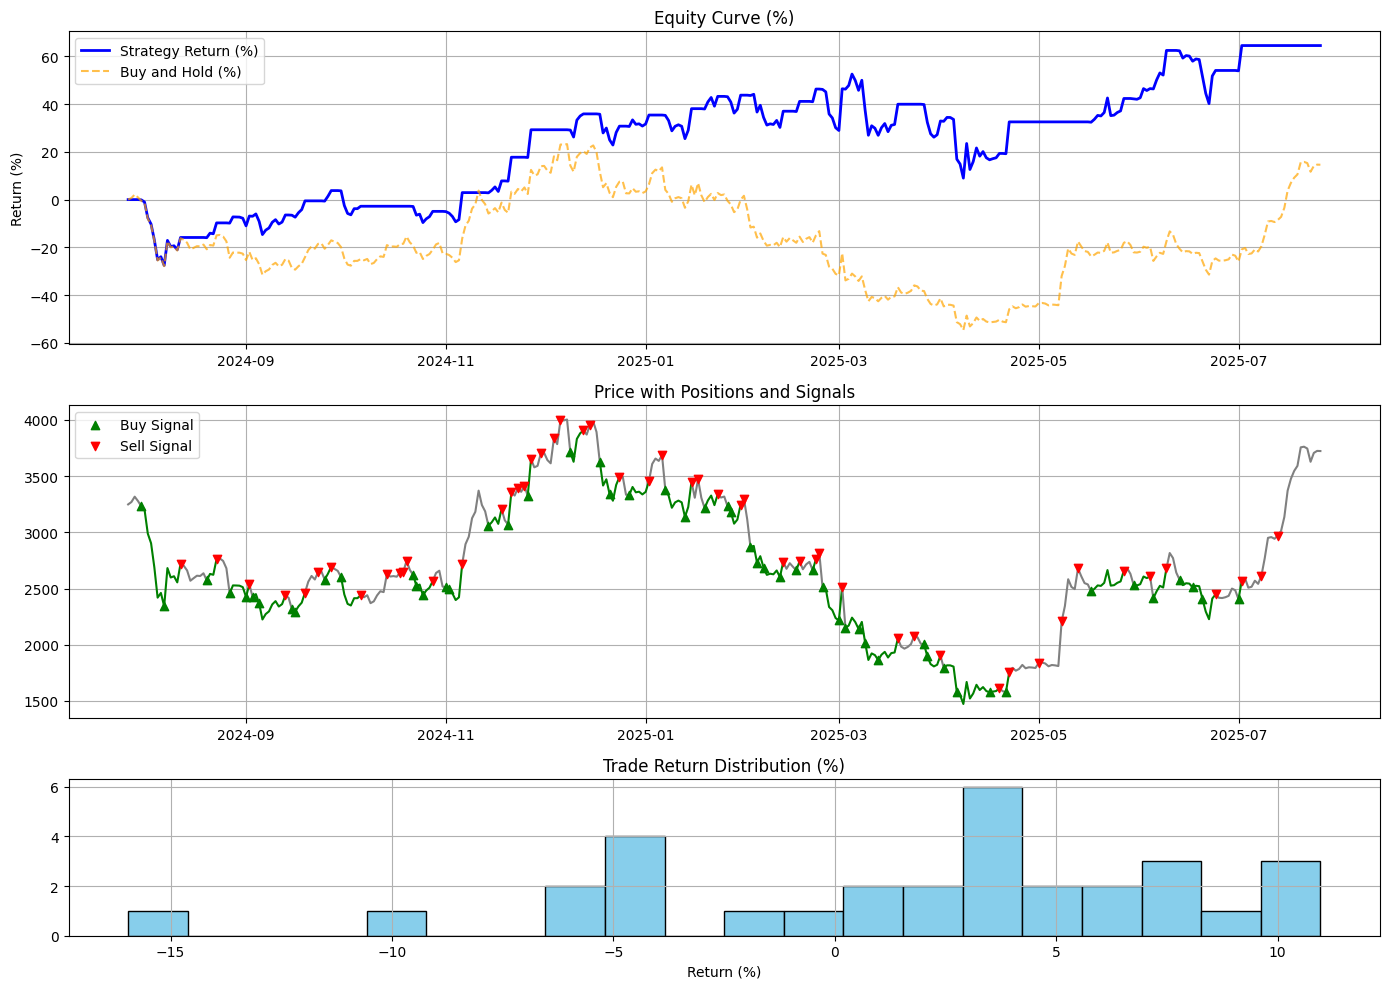

In [1]:
import Technicalindicatorstrategy
from datetime import datetime
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import warnings 
warnings.filterwarnings('ignore')

strategies = [
    "adx","tvl_sma", "boll", "cci", "ema", "kd",
    "macd", "momentum", "rsi", "sma",
    "smartmoney", "williams"
]
strategies = ["tvl_sma"]

for strat_name in strategies[:3]:
    print(f"\n=== 策略：{strat_name} ===")
    strat_module = getattr(Technicalindicatorstrategy, strat_name)

    for lookback in [100,300,1000,2000]:
    
        # 假設每個模組都有 get_signals 函式
        df_signals = strat_module.get_signals("ETHUSDT", "1d", 
                                              datetime.now(), 
                                              limit=365, 
                                              protocol="ethereum", 
                                              window=5)
        
        # 回測
        result = backtest_signals(df_signals, 
                                initial_capital=100, 
                                fee_rate=0.001, 
                                leverage=1, 
                                allow_short=False)
        
        # 繪圖
        plot_backtest_result(result)


In [ ]:
from online.auto_trade_future import auto_trade_futures
from Technicalindicatorstrategy import testsma

class StrategyWrapper:
    def __init__(self,n1=1,n2=2):
        self.n1 = n1
        self.n2 = n2
        self.limit = 300

    def get_signals(self, symbol, interval, end_time):
        print(f"⚙️ 呼叫策略：symbol={symbol}, interval={interval}, end_time={end_time}, "
              f"n1={self.n1}, n2={self.n2}")
        return testsma.get_signals(symbol, interval, end_time, limit=self.limit, n1=self.n1,n2=self.n2)

strategy = StrategyWrapper()

auto_trade_futures(symbol="ETH/USDT",interval="1m",usdt_per_order=500,leverage=1,strategy=strategy)

✅ 使用 Testnet 模式
✅ 槓桿設為 1x
✅ 最小下單量: 0.0001, 數量精度: 0.0001

⚙️ 呼叫策略：symbol=ETHUSDT, interval=1m, end_time=2025-07-26 16:12:10.521411, n1=1, n2=2
[2025-07-26 16:12:10] Close: 3743.86, Signal: 1
目前持倉: 0.133000 (long), USDT 餘額: 14487.53
⏸ 訊號未變或已有倉位，無操作
